# Computation Problem: Data Visualization
## Jincheng(Eric) Huang

In [1]:
import numpy as np
import scipy as sp
from scipy import special
from scipy import stats
from matplotlib import pyplot as plt

## Problem 2

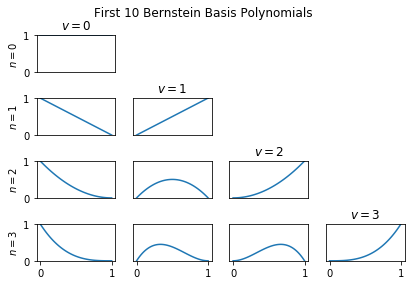

In [2]:
# Problem 2
x = np.linspace(0,1,100)
fig,ax = plt.subplots(4,4)

for n in range(4):
    for v in range(n+1):
        b = sp.special.binom(n,v) * x**v * (1-x)**(n-v)
        idx = 4*n + v + 1
        #ax = plt.subplot(4,4,idx)
        ax[n,v].plot(x,b)
        #ax[n,v].set_title(r"$n={},v={}$".format(n,v))
        ax[n,v].set_ylim([0,1])
        
        if v == 0:
            ax[n,v].set_ylabel(r"$n={}$".format(n))
        if n == v:
            ax[n,v].set_title(r"$v={}$".format(v))
        if n != 3:
            ax[n,v].set_xticks([])
        if v != 0:
            ax[n,v].set_yticks([])

for n in range(4):
    for v in range(4):
        if v > n:
            fig.delaxes(ax[n,v])

fig.tight_layout()
fig.subplots_adjust(top=0.88)
fig.suptitle('First 10 Bernstein Basis Polynomials')
plt.show()

# Problem 3

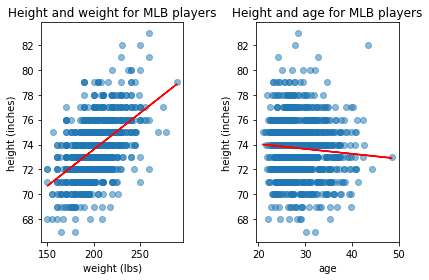

In [3]:
# Problem 3
data = np.load('../../../Computation/Wk1_PyIntro/MLB.npy')
height = data[:,0]
weight = data[:,1]
age = data[:,2]

fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(weight,height,alpha=.5)
ax.set_xlabel('weight (lbs)')
ax.set_ylabel('height (inches)')
ax.set_title('Height and weight for MLB players')

results = sp.stats.linregress(weight,height)
plt.plot(weight,results.intercept+results.slope*weight,'r',label='fitted line')

ax = fig.add_subplot(122)
ax.scatter(age,height,alpha=.5)
ax.set_xlabel('age')
ax.set_ylabel('height (inches)')
ax.set_title('Height and age for MLB players')

results = sp.stats.linregress(age,height)
plt.plot(age,results.intercept+results.slope*age,'r',label='fitted line')
plt.tight_layout()


# Problem 5

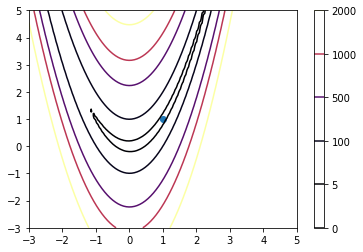

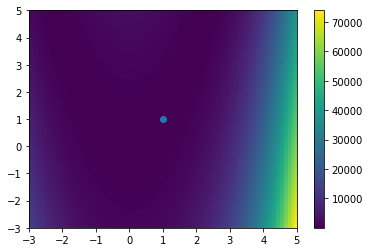

In [4]:
# Problem 5
x = np.linspace(-3,5,100)
X,Y = np.meshgrid(x,x)
Z = (1-X)**2 + 100*(Y-X**2)**2

#fig, ax = plt.subplots(1,2)
fig, ax = plt.subplots()
v = ax.contour(X,Y,Z,[0, 5, 100, 500, 1000, 2000],cmap='inferno')
fig.colorbar(v,ax=ax)
ax.scatter([1],[1])
#ax.set_aspect('auto')

fig, ax = plt.subplots()
ax.pcolormesh(X,Y,Z,cmap='viridis')
cax = ax.pcolormesh(X,Y,Z,cmap='viridis')
fig.colorbar(cax, ax=ax)
ax.scatter([1],[1])
#ax.set_aspect('auto')

plt.show()

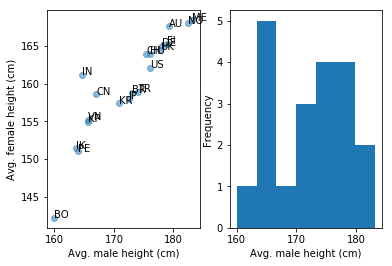

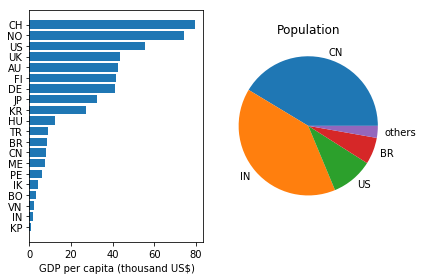

In [5]:
# Problem 6
data = np.load('../../../Computation/Wk1_PyIntro/countries.npy')
population = data[:,0]
GDP = data[:,1]
maleHeight = data[:,2]
femaleHeight = data[:,3]
countries = np.array(["AU", "BO", "BR", "CN",
    "FI", "DE", "HU", "IN",
    "JP", "KP", "ME", "NO",
    "PE", "KR", "IK", "CH",
    "TR", "UK", "US", "VN"])

fig, ax = plt.subplots(1,2)
ax[0].scatter(maleHeight,femaleHeight,alpha=.5)
ax[0].set_xlabel('Avg. male height (cm)')
ax[0].set_ylabel('Avg. female height (cm)')

i = 0
for xy in zip(maleHeight,femaleHeight):
    ax[0].annotate(countries[i],xy=xy)
    i = i + 1
    
ax[1].hist(maleHeight,bins=7)
ax[1].set_xlabel('Avg. male height (cm)')
ax[1].set_ylabel('Frequency')

GDP_capita = GDP / population
positions = np.arange(len(countries))+0.5
idx = np.argsort(GDP_capita)
GDP_capita = GDP_capita[idx]

fig1,ax1 = plt.subplots(1,2)
ax1[0].barh(positions,GDP_capita,align='center')
#ax1[0].set_xlim([140,175])
ax1[0].set_yticks(positions)
ax1[0].set_yticklabels(countries[idx])  
ax1[0].set_xlabel('GDP per capita (thousand US$)')

idx = population.argsort()[::-1]
population = population[idx].copy()
population_short = population[:4].copy()
population_short = np.hstack((population_short,population[5]))
countries = np.concatenate((countries[idx[:4]],np.array(['others'])))
ax1[1].pie(population_short,labels=countries)
ax1[1].title.set_text('Population')
    
plt.tight_layout()

